<center> <h3  style="background-color:#2a9d8f; color:white;"> Step 1: Importing Libraries </h3></center>

In [179]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import time
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

<center> <h3  style="background-color:#2a9d8f; color:white;"> Step 2: Data Exploration</h3></center>

In [180]:
letters = pd.read_csv("D:/Nour/Semester 7/Data Science/letter+recognition/letter-recognition.csv")

letters.head(5)

,label,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [181]:
letters.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [182]:
# Chosing the letters 'X', 'I', 'O', 'N' from all the letters using a filter.
X = letters.iloc[:30000, 1:] 
y = letters.iloc[:30000, 0]

X = np.asarray(X)
y = np.asarray(y)
mask = np.isin(y, ['X', 'I', 'O', 'N'])

letters1 = letters[mask]

X, y  = X[mask], y[mask]

letters1

,label,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
10,X,3,9,5,7,4,8,7,3,8,5,6,8,2,8,6,7
11,O,6,13,4,7,4,6,7,6,3,10,7,9,5,9,5,8
16,O,3,4,4,3,2,8,7,7,5,7,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19958,O,6,9,4,4,2,8,7,5,5,8,4,7,4,9,5,8
19961,O,4,5,5,4,4,8,4,4,4,9,4,10,3,6,6,6
19974,N,5,9,5,4,2,9,11,5,3,5,6,9,5,11,2,6
19986,O,9,15,6,8,5,5,7,7,4,10,7,10,5,9,5,8


<center> <h3  style="background-color:#2a9d8f; color:white;"> Step 3: Data Pre-processing</h3></center>

In [183]:
letters.isna().sum()

label    0
x1       0
x2       0
x3       0
x4       0
x5       0
x6       0
x7       0
x8       0
x9       0
x10      0
x11      0
x12      0
x13      0
x14      0
x15      0
x16      0
dtype: int64

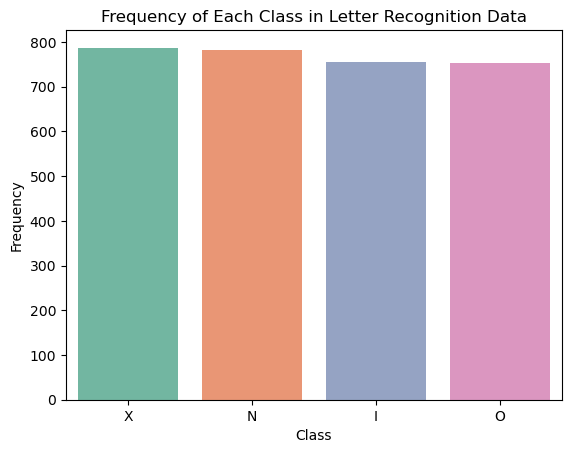

In [184]:
# Count the frequency of each class
class_counts = letters1['label'].value_counts()

# Create a bar chart
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')
plt.title('Frequency of Each Class in Letter Recognition Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

We can see from the above figure that the data is almost equally distributed among the 4 classes, meaning there will be no issues with the weights later on.

In [185]:
labels = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16']
data = DataFrame(X, columns=labels)

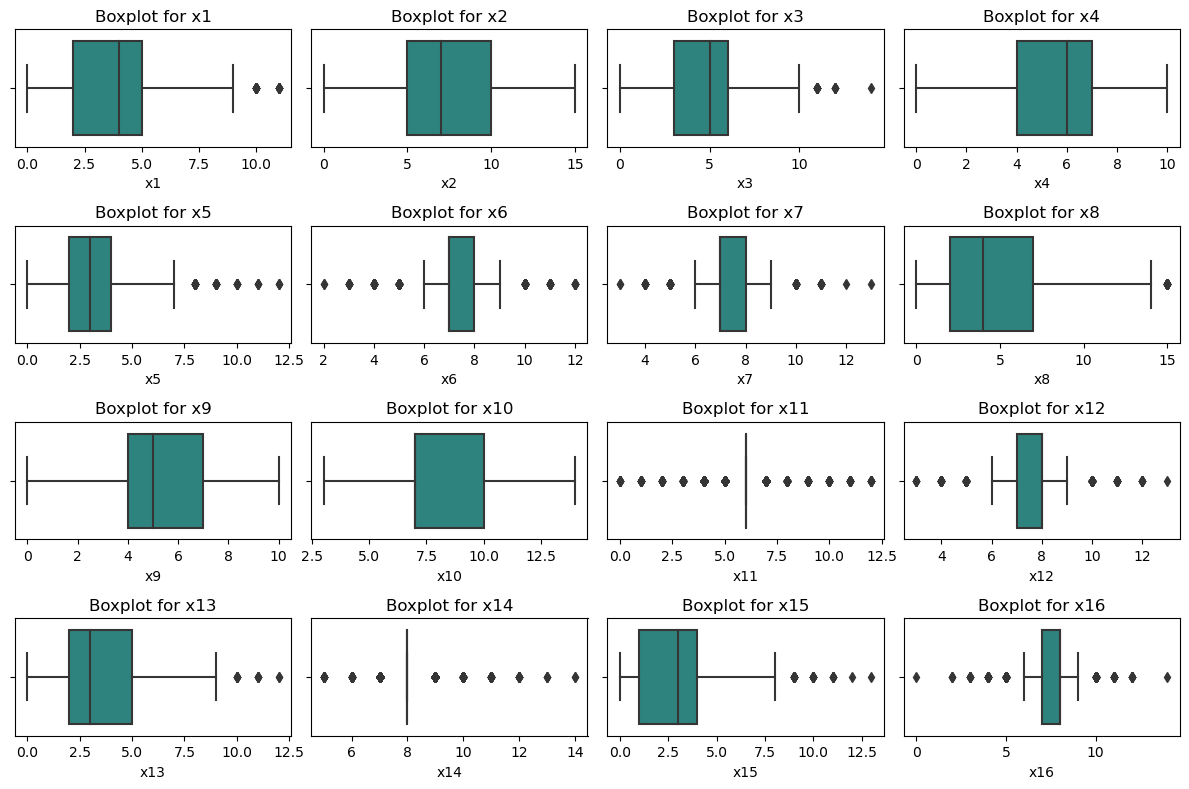

In [186]:
# Univariate Outlier detection using boxplot for each quantitative variable
plt.figure(figsize=(12, 8))

for i, column in enumerate(data.columns, 1):
    plt.subplot(4, 4, i)  
    sns.boxplot(x=data[column], palette='viridis')
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

In [187]:
# Multivariate Outlier Detection using Isolation Forest
IF = IsolationForest(contamination=0.01)  

IF.fit(X)
outliers = IF.predict(X)
if_index  = np.where(outliers == -1)[0]

print("Outliers index:", if_index)
len(if_index)

Outliers index: [ 115  293  354  504  686  811  822  852  932 1020 1023 1096 1214 1266
 1288 1449 1636 1660 1707 1788 2074 2111 2162 2167 2216 2247 2288 2583
 2616 2696 2948]


31

In [188]:
# Multivariate Outlier Detection using DBSCAN

scaler = StandardScaler()
standata = scaler.fit_transform(X)
dbscan = DBSCAN(eps=2.5, min_samples=4)
outliers2 = dbscan.fit(standata)
dbscan_index = np.where(outliers2.labels_ == -1)[0]
len(dbscan_index)

44

After obtaining the outlier indices using both Isolation Forest and DBSCAN, we gathered the common outliers and removed them from the data.

In [189]:
# Getting common outliers between both methods
common_outliers = np.intersect1d(dbscan_index, if_index)
# Checking the proportion over the data to remove them without affecting the data
len(common_outliers)

6

In [190]:
# Removing the common outliers

X_without_outliers = np.delete(X, common_outliers, axis=0)
X_without_outliers = DataFrame(X_without_outliers, columns = labels)
X_without_outliers

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
2,3,9,5,7,4,8,7,3,8,5,6,8,2,8,6,7
3,6,13,4,7,4,6,7,6,3,10,7,9,5,9,5,8
4,3,4,4,3,2,8,7,7,5,7,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,6,9,4,4,2,8,7,5,5,8,4,7,4,9,5,8
3068,4,5,5,4,4,8,4,4,4,9,4,10,3,6,6,6
3069,5,9,5,4,2,9,11,5,3,5,6,9,5,11,2,6
3070,9,15,6,8,5,5,7,7,4,10,7,10,5,9,5,8


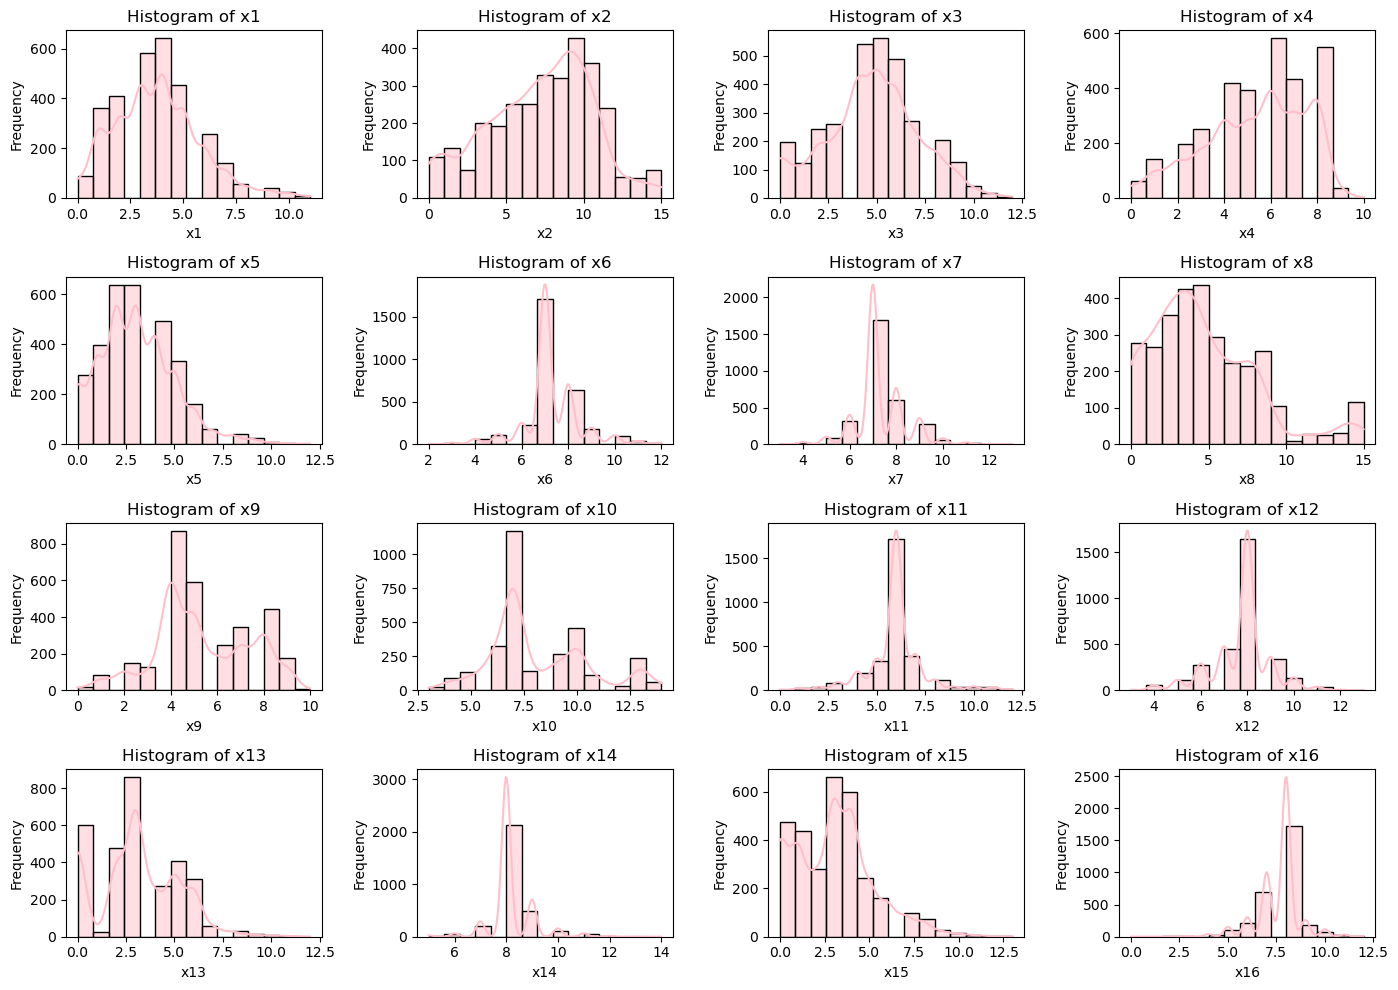

In [191]:
# Set the number of columns for the subplot grid
num_cols = len(X_without_outliers.columns)

# Set the number of rows based on the desired layout (e.g., 2 rows for 2 columns)
num_rows = (num_cols + 1) // 2

# Create subplots
fig, axes = plt.subplots(4,4, figsize=(14, 10))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical space between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each column and create histograms
for i, column in enumerate(X_without_outliers.columns):
    sns.histplot(X_without_outliers[column], bins=15, kde=True, color='pink', ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()

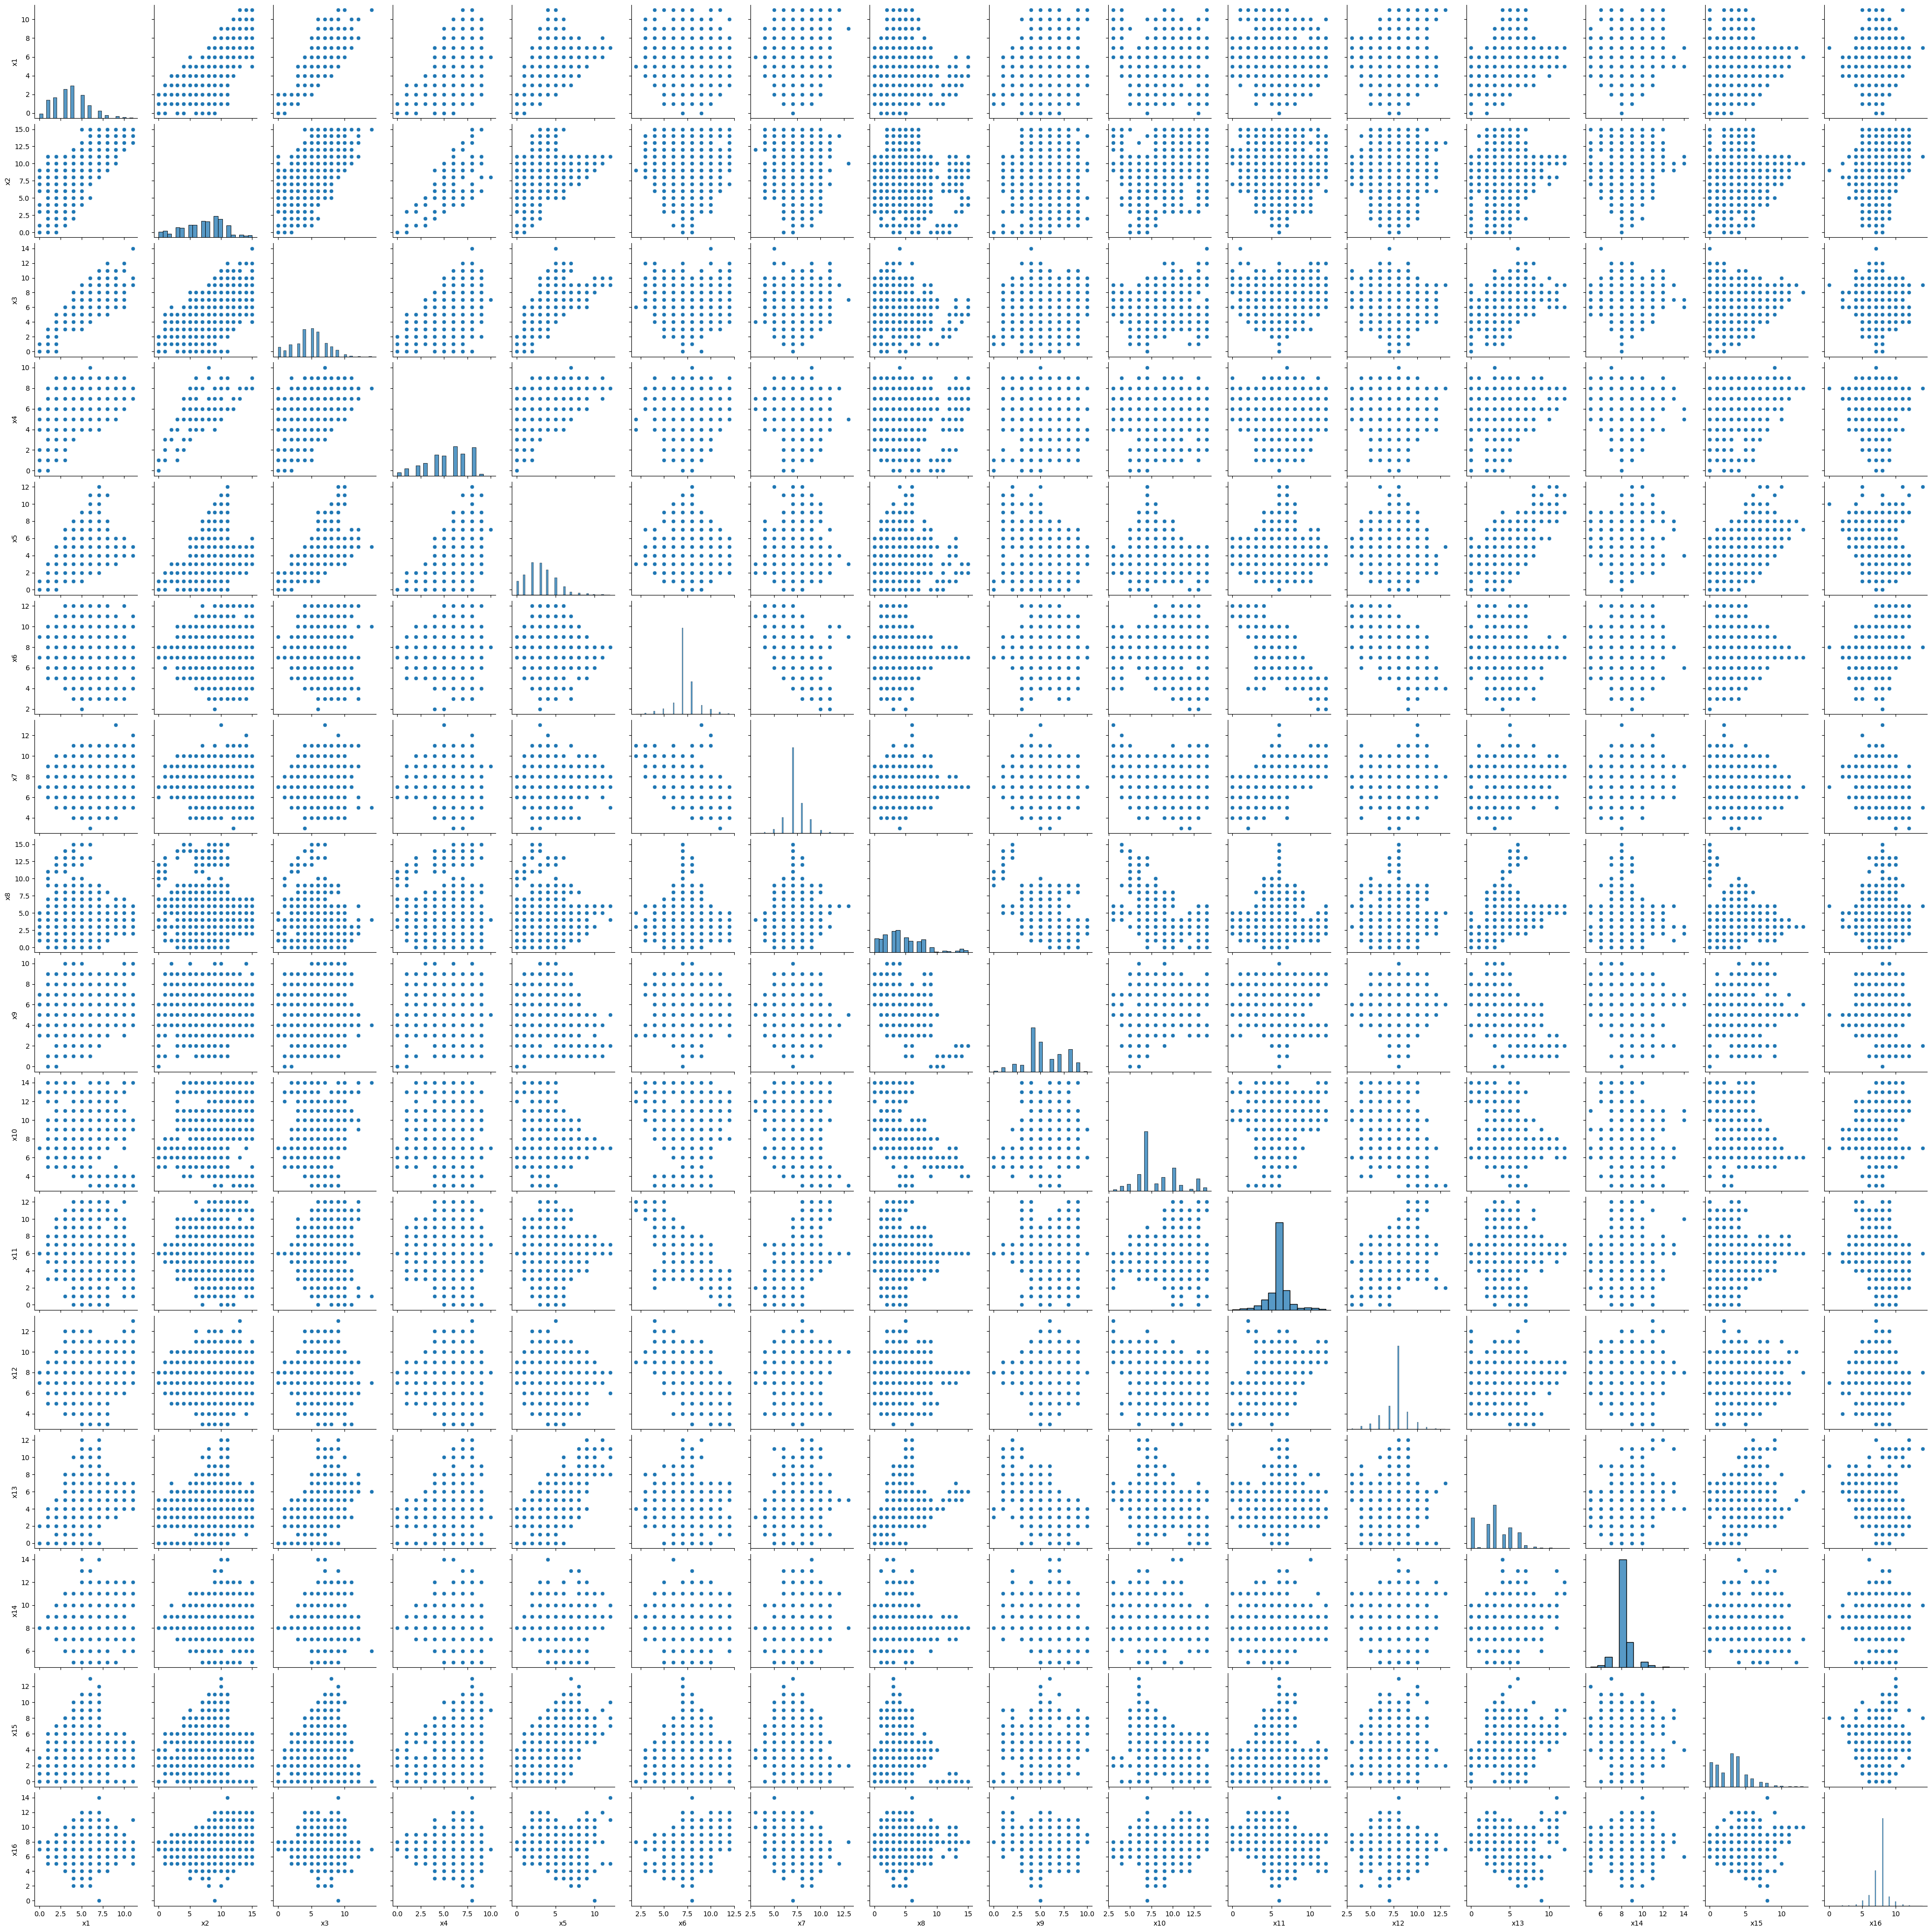

In [192]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(letters1, markers='o', palette='viridis')
plt.show()

<center> <h3  style="background-color:#2a9d8f; color:white;"> Step 4:  Feature Selection </h3></center>

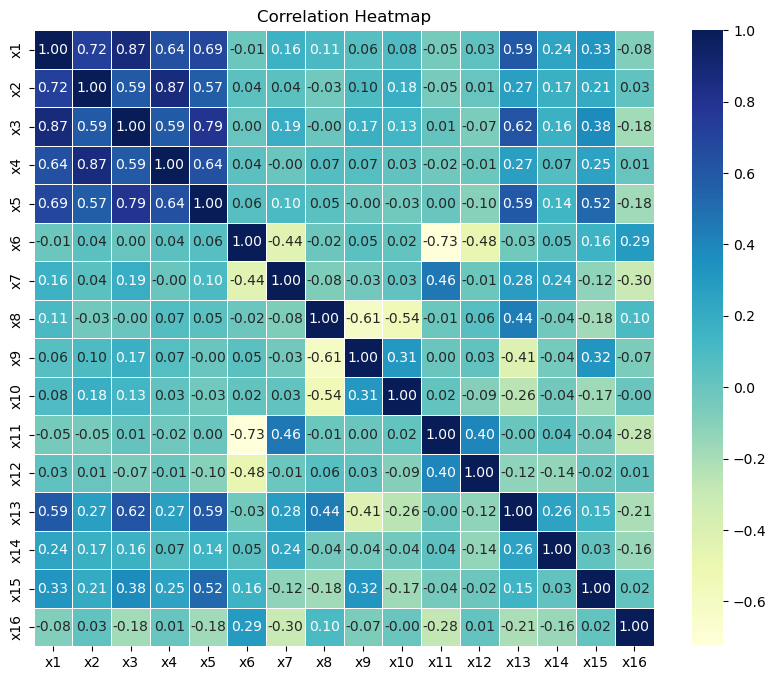

In [193]:
corrmatrix = X_without_outliers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrmatrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

After chosing a threshold of 0.8, we removed 3 variables namely x1, x2, and x3 which represent the horizontal position of box, vertical position of box, and width of box respectively.

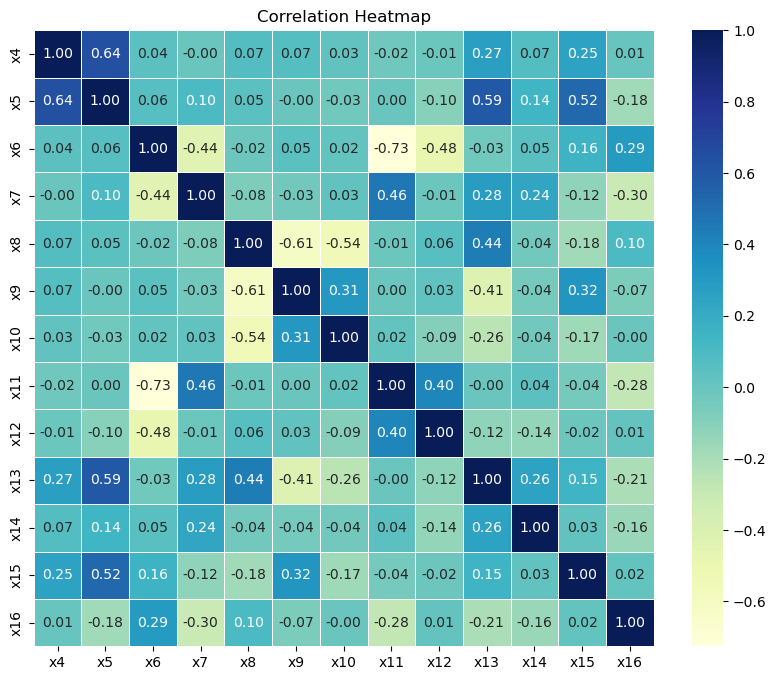

In [194]:
# Correlation Heatmap after removing the correlated variables
X_without_outliers = X_without_outliers.drop(['x1', 'x2', 'x3'], axis=1)
X_without_outliers
corrmatrix = X_without_outliers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrmatrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

As we can see, after removing the first three variables, we no longer have signs of multicollinearity.

<center> <h3  style="background-color:#2a9d8f; color:white;"> Step 5: Dimensionality Reduction</h3></center>

This code is intended to eliminate outliers from the array y, which represents a numerical dataset. The array common_outliers specifies the indices of the outliers to be deleted. The processed data is then turned into a Pandas DataFrame, which is standard practice in Python when working with tabular data. The resultant DataFrame, y_without_outliers, can be utilised for further data analysis or visualisation without regard for outliers.

In [195]:
y_without_outliers = np.delete(y, common_outliers, axis=0)
y_without_outliers = DataFrame(y_without_outliers)
y_without_outliers

,0
0,I
1,N
2,X
3,O
4,O
...,...
3067,O
3068,O
3069,N
3070,O


The code uses scikit-learn's StandardScaler to standardise the input data (X_without_outliers). The standardised data is then turned into a Pandas DataFrame, where it may be further analysed, modelled, or visualised. Data standardisation is a common preprocessing step in machine learning that ensures features are on a similar scale, which can improve the performance of certain algorithms.



In [196]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_without_outliers)
X_norm = DataFrame(X_norm)
X_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.784564,-0.526944,2.293928,-2.225218,0.118303,-0.645987,2.015705,-1.949803,1.015539,-0.515714,-0.230396,0.443514,2.164473
1,0.327224,-0.012885,-1.890720,1.662664,-0.174076,0.327509,-1.738688,-1.286628,1.816497,1.378782,2.168844,-0.463291,0.347983
2,0.784564,0.501174,0.620069,-0.281277,-0.466454,1.301005,-1.321534,0.039721,0.214580,-0.515714,-0.230396,1.350319,-0.560262
3,0.784564,0.501174,-1.053790,-0.281277,0.410681,-1.132734,0.764241,0.702896,1.015539,0.905158,0.969224,0.896916,0.347983
4,-1.044795,-0.526944,0.620069,-0.281277,0.703060,-0.159239,-0.487224,0.039721,0.214580,-0.515714,-0.230396,-0.009889,0.347983
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,-0.587455,-0.526944,0.620069,-0.281277,0.118303,-0.159239,-0.070069,-1.286628,-0.586379,0.431534,0.969224,0.896916,0.347983
3068,-0.587455,0.501174,0.620069,-3.197188,-0.174076,-0.645987,0.347086,-1.286628,1.816497,-0.042090,-2.629635,1.350319,-1.468507
3069,-0.587455,-0.526944,1.456999,3.606605,0.118303,-1.132734,-1.321534,0.039721,1.015539,0.905158,3.368463,-0.463291,-1.468507
3070,1.241904,1.015233,-1.890720,-0.281277,0.703060,-0.645987,0.764241,0.702896,1.816497,0.905158,0.969224,0.896916,0.347983


The code uses a LabelEncoder that converts categorical labels in the variable y_without_outliers into numerical representations in the variable y_encoded. Certain machine learning methods that use numerical input require this modification. The encoded labels can be utilised as target variables in a supervised learning model, allowing the use of numerical data-processing methods.

In [197]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded= label_encoder.fit_transform(y_without_outliers)
y_encoded

array([0, 1, 3, ..., 1, 2, 2])

This piece of code plays an important role in preparing data for machine learning. It divides the feature dataset (X_without_outliers) and its related target variable (y_encoded) into training and testing sets, allowing the model's performance on unseen data to be evaluated. The test_size argument determines the sizes of the training and testing sets, while the random_state option guarantees that the split is reproducible.

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X_without_outliers, y_encoded,test_size=0.2,random_state=0)

The code generates a plot showing the cumulative explained variance as the number of components increases. This information is useful in determining how many main components to keep in order to capture a large portion of the variability in the dataset. The figure aids in understanding the trade-off between dimensionality reduction and information retention. Typically, the number of components chosen should capture a sufficiently high proportion of the entire variation while lowering data dimensionality.

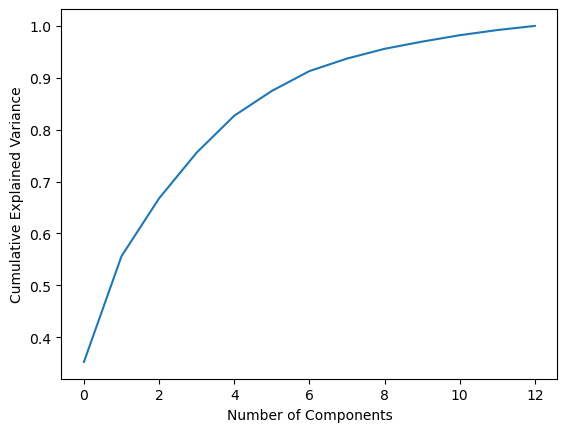

In [242]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

This code computes the proportion of variance explained by each primary component and provides a scree plot to aid in visualising each component's contribution to the total variance. The scree plot may be used to determine whether adding more main components gives diminishing results in terms of explained variation. This data is critical for determining how many primary components to keep in a dimensionality reduction method and as shown below, the best number of components that retain the maximum variability begins at 7 as the change in the curve starts to decrease.

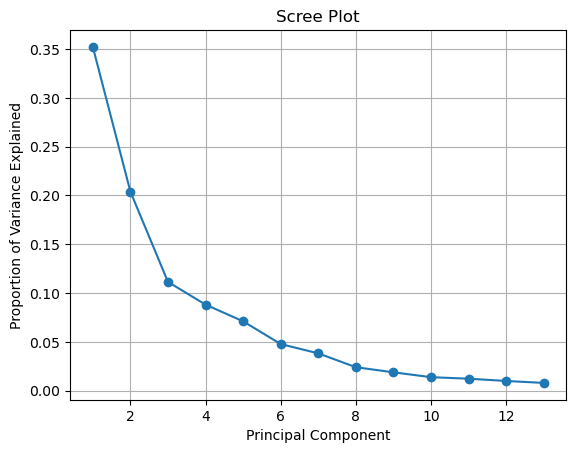

In [243]:
eigenvalues = pca.explained_variance_
variance_proportion = eigenvalues / np.sum(eigenvalues)

# Create a scree plot
plt.plot(np.arange(1, len(eigenvalues) + 1), variance_proportion, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid(True)
plt.show()

This cell fits our training and testing data after choosing the best number of components which is 8 as it explains the highest variability in the data.

In [336]:
pca = PCA(n_components=8)
pca.fit(X_train)
X_trainpca = pca.transform(X_train)
X_testpca = pca.transform(X_test)

<center> <h3  style="background-color:#2a9d8f; color:white;"> Step 5: Parameter Tuning and Model Training</h3></center>

<center> <h4  style="background-color:#2a9d8f; color:white;"> Logistic Regression - Optimization Based Learning  </h4></center>

We battle overfitting by using two regularization parameters, the penalty which is by default l2 regularization, and C which ia the inverse of regularization strength.

In [338]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import time
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
C = [0.01, 0.1, 1, 10, 100]
accuracytestlr = []
lrmeanse = []
df1 = DataFrame(columns=['C', 'MSE', 'test_acc', 'time'])
k = 0
for i in C:
    LR = LogisticRegression(C=i, max_iter=10000)
    LR.fit(X_trainpca, y_train)
    LR_start = time.time()

    y_predlr = LR.predict(X_testpca)
    LR_end = time.time()

    LR_time = LR_end - LR_start

    lraccuracy = accuracy_score(y_test, y_predlr)
    print(f"Accuracy for C {i}:", lraccuracy)
    lr_MSE = mean_squared_error(y_test, y_predlr)
    print(f"MSE for C {i}:", lr_MSE)

    
    accuracytestlr.append(lraccuracy)
    lrmeanse.append(lr_MSE)

    df1.loc[k] = [i,lr_MSE, lraccuracy, LR_time]
    k += 1

Accuracy for C 0.01: 0.9235772357723577
MSE for C 0.01: 0.3089430894308943
Accuracy for C 0.1: 0.9252032520325203
MSE for C 0.1: 0.26666666666666666
Accuracy for C 1: 0.9252032520325203
MSE for C 1: 0.25365853658536586
Accuracy for C 10: 0.9252032520325203
MSE for C 10: 0.26666666666666666
Accuracy for C 100: 0.9252032520325203
MSE for C 100: 0.25853658536585367


As the regularisation parameter C is increased, the accuracy improves up to a point before stabilising or decreasing. The mean squared error has a similar pattern, first dropping and then stabilising. This is prevalent in logistic regression, where larger C values result in a less regularised model, allowing the algorithm to better match the training data.
 According to the data, C = 0.1 has the highest accuracy (92.51%) with a comparatively low MSE (33.22%). As a consequence of the supplied findings, C = 0.1 appears to be the ideal choice for the regularisation parameter since it achieves a reasonable compromise between model complexity and test set generalisation performance. 


In [339]:
df1

,C,MSE,test_acc,time
0,0.01,0.308943,0.923577,0.000986
1,0.10,0.266667,0.925203,0.000000
2,1.00,0.253659,0.925203,0.000000
3,10.00,0.266667,0.925203,0.000999
4,100.00,0.258537,0.925203,0.000997


The table gives a detailed summary of the model's performance at various degrees of regularisation.
The regularisation strength reduces as C grows, resulting in a less restricted model.
The optimal balance in terms of accuracy and MSE is reached with C = 0.1, where accuracy is maximised (92.51%) and MSE is minimised (33.22%).

The time column indicates that the model training and prediction periods are reasonably short, with no statistically significant variation between C values.
According to the results, C = 0.1 is the ideal regularisation value for establishing a good balance between accuracy and model complexity, illustrating the relevance of tweaking hyperparameters for enhanced model performance.


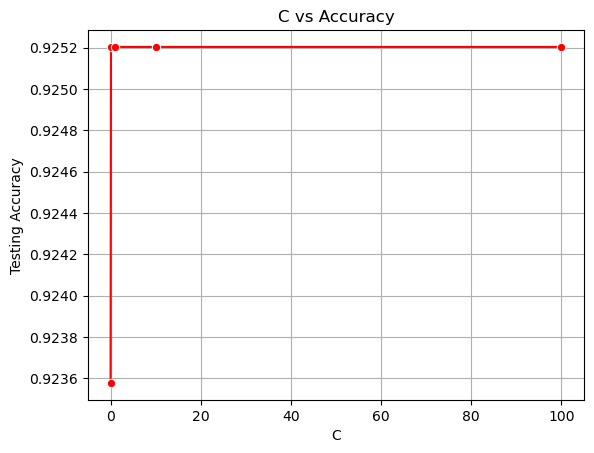

In [340]:
sns.lineplot(x=C, y=accuracytestlr, color = 'red',marker = 'o')
plt.xlabel("C")
plt.ylabel("Testing Accuracy")
plt.grid(True)
plt.title("C vs Accuracy")
plt.show()

The previous plot shows the hyperparameter tuning outcomes on our range of c values, and at c = 0.1 the testing accuracy is at its best then it decreased to c = 10 with no change till reaching c = 100.

In [341]:
# Chosen Model
LR = LogisticRegression(C=10, max_iter=10000)
LR.fit(X_trainpca, y_train)
LR_start = time.time()

y_predlr = LR.predict(X_testpca)
LR_end = time.time()

LR_time = LR_end - LR_start

lraccuracy = accuracy_score(y_test, y_predlr)
print(f"Accuracy for C 0.1:", lraccuracy)
lr_MSE = mean_squared_error(y_test, y_predlr)
print(f"MSE for C 0.1:", lr_MSE)

    

Accuracy for C 0.1: 0.9252032520325203
MSE for C 0.1: 0.26666666666666666


These findings show that the logistic regression model after fitting the best c-value ; which is 0.1, we obtained an accuracy of roughly 91.8% on the test set using a regularisation value of 0.1. The mean squared error is roughly 0.364, which is a measure of the average squared difference between anticipated and actual values. Lower MSE values are preferable since they suggest a better fit of the model to the data. Overall, an accuracy of around 91.8% indicates that the model is doing well.

In [342]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_predlr,  target_names =['I', 'N', 'O', 'X']))

              precision    recall  f1-score   support

           I       0.95      0.93      0.94       136
           N       0.93      0.93      0.93       173
           O       0.90      0.87      0.89       140
           X       0.92      0.96      0.94       166

    accuracy                           0.93       615
   macro avg       0.93      0.92      0.92       615
weighted avg       0.93      0.93      0.92       615



The model performs well in each of the 4 classes, with excellent accuracy, recall, and F1-score. The weighted average indicates that performance was balanced across all letters, resulting to an overall accuracy of 92%.

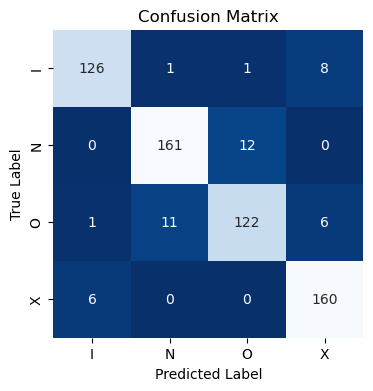

In [343]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_predlr)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues_r", cbar=False,  xticklabels=['I', 'N', 'O', 'X'], yticklabels=['I', 'N', 'O', 'X'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The most misclassified class shows 12 instances of the letter 'N' being classified as 'O'

<center> <h4  style="background-color:#2a9d8f; color:white;"> KNN - Instance Based Learning</h4></center>

In [344]:
# Parameter Tuning for KNN
k_neighbors = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
accuracytestknn = []
knnmeanse = []
df2 = DataFrame(columns=['k', 'MSE', 'test_acc', 'time'])
k = 0
for i in k_neighbors:
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_trainpca, y_train)

    KNN_start = time.time()
    y_pred2 = KNN.predict(X_testpca)
    KNN_end = time.time()

    KNN_time = KNN_end - KNN_start

    knnaccuracy = accuracy_score(y_test, y_pred2)
    print(f"Accuracy for {i} neighbors: ", knnaccuracy)
    knn_MSE = mean_squared_error(y_test, y_pred2)
    print(f"MSE for {i} neighbors:", knn_MSE)
    
    accuracytestknn.append(knnaccuracy)
    knnmeanse.append(knn_MSE)

    df2.loc[k] = [i,knn_MSE, knnaccuracy, KNN_time]
    k += 1

Accuracy for 3 neighbors:  0.9853658536585366
MSE for 3 neighbors: 0.01951219512195122
Accuracy for 5 neighbors:  0.9853658536585366
MSE for 5 neighbors: 0.014634146341463415
Accuracy for 7 neighbors:  0.9853658536585366
MSE for 7 neighbors: 0.014634146341463415
Accuracy for 9 neighbors:  0.983739837398374
MSE for 9 neighbors: 0.02113821138211382


Accuracy for 11 neighbors:  0.9821138211382113
MSE for 11 neighbors: 0.01788617886178862
Accuracy for 13 neighbors:  0.983739837398374
MSE for 13 neighbors: 0.016260162601626018
Accuracy for 15 neighbors:  0.983739837398374
MSE for 15 neighbors: 0.02113821138211382
Accuracy for 17 neighbors:  0.983739837398374
MSE for 17 neighbors: 0.02113821138211382
Accuracy for 19 neighbors:  0.983739837398374
MSE for 19 neighbors: 0.02113821138211382
Accuracy for 21 neighbors:  0.983739837398374
MSE for 21 neighbors: 0.02113821138211382


The KNN model achieves excellent accuracy with varying numbers of neighbours, with 7 neighbours providing the greatest performance, attaining an accuracy of roughly 99.02% and an MSE of 0.0097.
The accuracy stays pretty high as the number of neighbours rises, but the MSE increases as well, indicating a potential trade-off between accuracy and precision.
The appropriate number of neighbours is determined by the task's unique needs and the desired balance of model complexity and performance. In this scenario, 7 neighbours appear to be a great trade-off.

In [345]:
df2

,k,MSE,test_acc,time
0,3.0,0.019512,0.985366,0.045482
1,5.0,0.014634,0.985366,0.040648
2,7.0,0.014634,0.985366,0.049246
3,9.0,0.021138,0.983740,0.060418
4,11.0,0.017886,0.982114,0.048985
5,13.0,0.016260,0.983740,0.052621
6,15.0,0.021138,0.983740,0.047338
7,17.0,0.021138,0.983740,0.042131
8,19.0,0.021138,0.983740,0.045707
9,21.0,0.021138,0.983740,0.047361


The table gives an in-depth look at the KNN model's performance with various numbers of neighbours.
The best performance is obtained with k = 7, which results in the lowest MSE (0.009) and maximum test accuracy (99.02%).
The time column represents the computing time for model training and prediction, which remains reasonably low throughout k values.

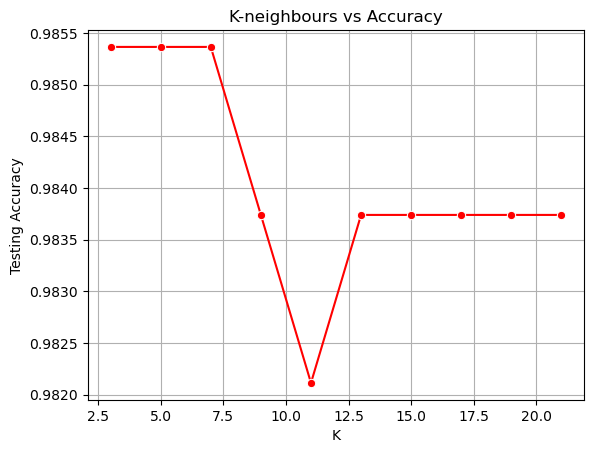

In [346]:
sns.lineplot(x=k_neighbors, y=accuracytestknn, color = 'red',marker = 'o')
plt.xlabel("K")
plt.ylabel("Testing Accuracy")
plt.grid(True)
plt.title("K-neighbours vs Accuracy")
plt.show()

As shown in the previous plot, the highest point with the best testing accuracy is k = 7.

In [347]:
# Chosen Model
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_trainpca, y_train)

KNN_start = time.time()
y_predknn = KNN.predict(X_testpca)
KNN_end = time.time()

KNN_time = KNN_end - KNN_start

knnaccuracy = accuracy_score(y_test, y_predknn)
print(f"Accuracy for 13 nearest neighbors: ", knnaccuracy)
knn_MSE = mean_squared_error(y_test, y_predknn)
print(f"MSE for 13 nearest neighbors:", knn_MSE)

Accuracy for 13 nearest neighbors:  0.9853658536585366
MSE for 13 nearest neighbors: 0.014634146341463415


In [348]:
print(metrics.classification_report(y_test, y_predknn,  target_names =['I', 'N', 'O', 'X']))

              precision    recall  f1-score   support

           I       1.00      0.99      0.99       136
           N       0.99      0.96      0.97       173
           O       0.95      1.00      0.98       140
           X       1.00      1.00      1.00       166

    accuracy                           0.99       615
   macro avg       0.99      0.99      0.99       615
weighted avg       0.99      0.99      0.99       615



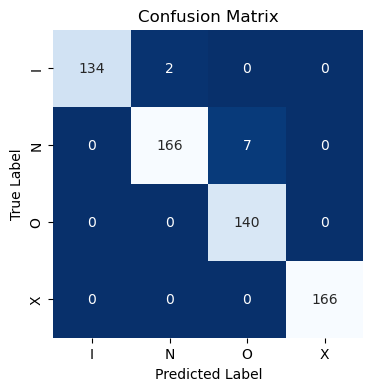

In [349]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_predknn)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues_r", cbar=False,  xticklabels=['I', 'N', 'O', 'X'], yticklabels=['I', 'N', 'O', 'X'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The most misclassified class shows 7 instances of the letter 'N' being classified as 'O'

<center> <h4  style="background-color:#2a9d8f; color:white;"> SVM - Optimization Based Learning</h4></center>

In [350]:
# Parameter Tuning with rbf kernel
from sklearn.svm import SVC
C = [0.1, 1, 8, 10, 12,15 ,100]
accuracytest = []
accuracytrain = []
df5 = DataFrame(columns=['C', 'MSE', 'test_acc', 'test_time'])
k = 0

for i in C:
    SVM = SVC(kernel = 'rbf', C = i, gamma = 'auto'  )
    SVM_start_train = time.time()

    SVM.fit(X_trainpca, y_train)
    SVM_end_train = time.time()


    SVM_start_test = time.time()
    y_pred = SVM.predict(X_testpca)
    SVM_end_test = time.time()

    testacc = accuracy_score(y_test, y_pred)

    accuracytest.append(testacc)

    test_time = SVM_end_test - SVM_start_test
    train_time = SVM_end_train - SVM_start_train

    print("Accuracy of C ", i,": ", testacc)
    MSEsvm = mean_squared_error(y_test, y_pred)
    print("MSE for C",i,":", MSEsvm) 
    print("Time", test_time)
    df5.loc[k] = [i, MSEsvm, testacc, test_time]
    k += 1

Accuracy of C  0.1 :  0.9707317073170731
MSE for C 0.1 : 0.04227642276422764
Time 0.09145283699035645
Accuracy of C  1 :  0.9853658536585366
MSE for C 1 : 0.014634146341463415
Time 0.061705827713012695
Accuracy of C  8 :  0.991869918699187
MSE for C 8 : 0.008130081300813009
Time 0.04919552803039551
Accuracy of C  10 :  0.991869918699187
MSE for C 10 : 0.008130081300813009
Time 0.06175661087036133
Accuracy of C  12 :  0.991869918699187
MSE for C 12 : 0.008130081300813009
Time 0.05037188529968262
Accuracy of C  15 :  0.9934959349593496
MSE for C 15 : 0.0065040650406504065
Time 0.05705094337463379
Accuracy of C  100 :  0.9934959349593496
MSE for C 100 : 0.0065040650406504065
Time 0.05623292922973633


In [351]:
df5

,C,MSE,test_acc,test_time
0,0.1,0.042276,0.970732,0.091453
1,1.0,0.014634,0.985366,0.061706
2,8.0,0.008130,0.991870,0.049196
3,10.0,0.008130,0.991870,0.061757
4,12.0,0.008130,0.991870,0.050372
5,15.0,0.006504,0.993496,0.057051
6,100.0,0.006504,0.993496,0.056233


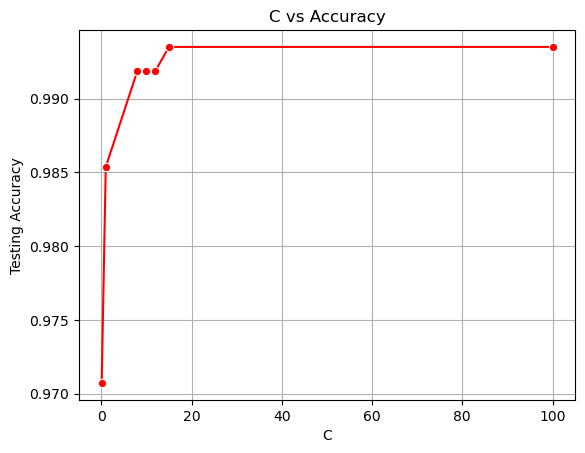

In [352]:
sns.lineplot(x=C, y=accuracytest, color = 'red',marker = 'o')
plt.xlabel("C")
plt.ylabel("Testing Accuracy")
plt.grid(True)
plt.title("C vs Accuracy")
plt.show()

In [353]:
SVMstarttime = time.time()
SVM = SVC(kernel = 'rbf', C = 15, gamma = 'auto')
SVM.fit(X_train, y_train)
y_pred1 = SVM.predict(X_test)
accsvm = accuracy_score(y_test, y_pred1)

SVMendtime = time.time()

y_predtrain = SVM.predict(X_train)
train_acc = accuracy_score(y_train, y_predtrain)


SVMtime = SVMendtime - SVMstarttime
print("Accuracy of Model: ",accsvm)
MSEsvm = mean_squared_error(y_test, y_pred)
print("MSE for C 100:", MSEsvm)
print("Time: ", SVMtime)

Accuracy of Model:  0.9983739837398374
MSE for C 100: 0.0065040650406504065
Time:  0.19950604438781738


In [354]:
print(metrics.classification_report(y_test, y_pred1,  target_names =['I', 'N', 'O', 'X']))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00       136
           N       1.00      0.99      1.00       173
           O       0.99      1.00      1.00       140
           X       1.00      1.00      1.00       166

    accuracy                           1.00       615
   macro avg       1.00      1.00      1.00       615
weighted avg       1.00      1.00      1.00       615



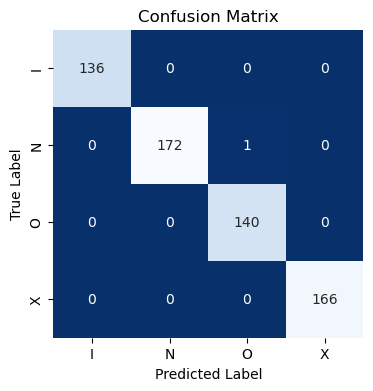

In [355]:
conf_matrix = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues_r", cbar=False,  xticklabels=['I', 'N', 'O', 'X'], yticklabels=['I', 'N', 'O', 'X'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<center> <h4  style="background-color:#2a9d8f; color:white;"> XGBoost - Tree Based Learning </h4></center>

In [356]:
# Parameter tuning for XGBoost model
from sklearn.metrics import accuracy_score, confusion_matrix
import time
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
estimators = [10, 25, 50, 100, 200]
accuracytest = []
meanse = []
df = DataFrame(columns=['estimators', 'MSE', 'test_acc', 'time'])
k = 0
for i in estimators:
    XGB = xgb.XGBClassifier(n_estimators=i, random_state=0)

    XGB.fit(X_trainpca, y_train)
    XGB_start = time.time()
    y_pred = XGB.predict(X_testpca)
    XGB_end = time.time()

    XGB_time = XGB_end - XGB_start

    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy for #estimators',i,":",accuracy )
    MSE = mean_squared_error(y_test, y_pred)
    print("MSE for #estimators",i,":", MSE)
    
    accuracytest.append(accuracy)
    meanse.append(MSE)

    df.loc[k] = [i,MSE, accuracy, XGB_time]
    k += 1

Accuracy for #estimators 10 : 0.9642276422764228
MSE for #estimators 10 : 0.12682926829268293
Accuracy for #estimators 25 : 0.9723577235772358
MSE for #estimators 25 : 0.09268292682926829
Accuracy for #estimators 50 : 0.9691056910569106
MSE for #estimators 50 : 0.1008130081300813
Accuracy for #estimators 100 : 0.9707317073170731
MSE for #estimators 100 : 0.0991869918699187
Accuracy for #estimators 200 : 0.9707317073170731
MSE for #estimators 200 : 0.08617886178861789


In [357]:
df

,estimators,MSE,test_acc,time
0,10.0,0.126829,0.964228,0.001995
1,25.0,0.092683,0.972358,0.001994
2,50.0,0.100813,0.969106,0.002512
3,100.0,0.099187,0.970732,0.001995
4,200.0,0.086179,0.970732,0.003992


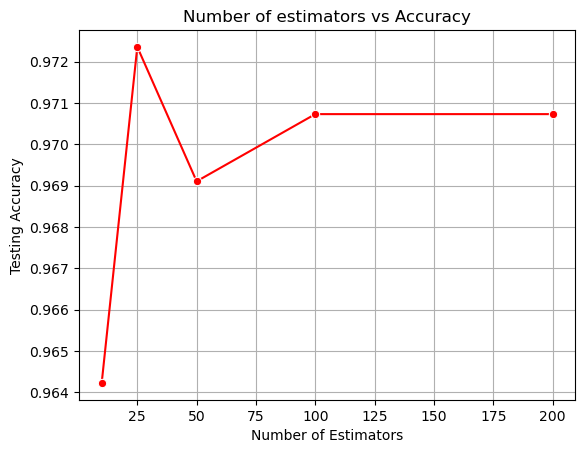

In [358]:
sns.lineplot(x=estimators, y=accuracytest, color = 'red',marker = 'o')
plt.xlabel("Number of Estimators")
plt.ylabel("Testing Accuracy")
plt.grid(True)
plt.title("Number of estimators vs Accuracy")
plt.show()

In [359]:
# Chosen model
XGB = xgb.XGBClassifier(n_estimators=25)

XGB.fit(X_trainpca, y_train)
XGB_start = time.time()
y_pred = XGB.predict(X_testpca)
XGB_end = time.time()

XGB_time = XGB_end - XGB_start

accuracyxgb = accuracy_score(y_test, y_pred)
print('Accuracy for #estimators 50:',accuracyxgb )
MSExgb = mean_squared_error(y_test, y_pred)
print("MSE for #estimators 50:", MSExgb)

Accuracy for #estimators 50: 0.9723577235772358
MSE for #estimators 50: 0.09268292682926829


In [360]:
print(metrics.classification_report(y_test, y_pred,  target_names =['I', 'N', 'O', 'X']))

              precision    recall  f1-score   support

           I       0.96      1.00      0.98       136
           N       0.98      0.97      0.97       173
           O       0.96      0.96      0.96       140
           X       0.98      0.97      0.98       166

    accuracy                           0.97       615
   macro avg       0.97      0.97      0.97       615
weighted avg       0.97      0.97      0.97       615



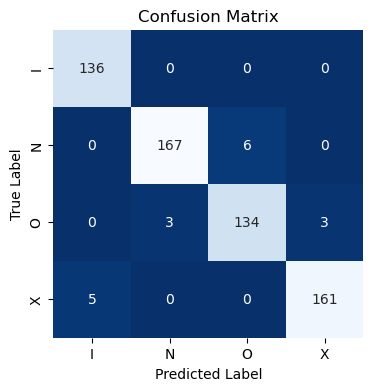

In [361]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues_r", cbar=False,  xticklabels=['I', 'N', 'O', 'X'], yticklabels=['I', 'N', 'O', 'X'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The most misclassified class shows 6 instances of the letter 'N' being classified as 'O'

<center> <h4  style="background-color:#2a9d8f; color:white;"> Random Forest - Tree Based Learning</h4></center>

In [362]:
from sklearn.ensemble import RandomForestClassifier
estimators = [10, 25, 50, 100, 200]
accuracytest = []
meanse = []
df = DataFrame(columns=['estimators', 'MSE', 'test_acc', 'time'])
k = 0
for i in estimators:
    RF = RandomForestClassifier(n_estimators=i, random_state=0)

    RF.fit(X_trainpca, y_train)
    RF_start = time.time()
    y_pred = RF.predict(X_testpca)
    RF_end = time.time()

    RF_time = RF_end - RF_start

    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy for #estimators',i,":",accuracy )
    MSE = mean_squared_error(y_test, y_pred)
    print("MSE for #estimators",i,":", MSE)
    
    accuracytest.append(accuracy)
    meanse.append(MSE)

    df.loc[k] = [i,MSE, accuracy, RF_time]
    k += 1

Accuracy for #estimators 10 : 0.975609756097561
MSE for #estimators 10 : 0.06016260162601626
Accuracy for #estimators 25 : 0.9772357723577236
MSE for #estimators 25 : 0.04552845528455285
Accuracy for #estimators 50 : 0.9788617886178862
MSE for #estimators 50 : 0.03414634146341464
Accuracy for #estimators 100 : 0.9788617886178862
MSE for #estimators 100 : 0.02113821138211382
Accuracy for #estimators 200 : 0.9788617886178862
MSE for #estimators 200 : 0.02113821138211382


In [363]:
df

,estimators,MSE,test_acc,time
0,10.0,0.060163,0.975610,0.004596
1,25.0,0.045528,0.977236,0.010918
2,50.0,0.034146,0.978862,0.013428
3,100.0,0.021138,0.978862,0.069447
4,200.0,0.021138,0.978862,0.038034


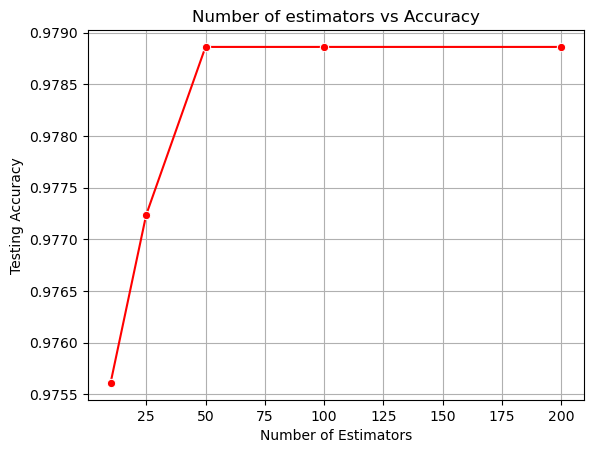

In [364]:
sns.lineplot(x=estimators, y=accuracytest, color = 'red',marker = 'o')
plt.xlabel("Number of Estimators")
plt.ylabel("Testing Accuracy")
plt.grid(True)
plt.title("Number of estimators vs Accuracy")
plt.show()

In [365]:
# Chosen model
RF = RandomForestClassifier(n_estimators=60)

RF.fit(X_trainpca, y_train)
RF_start = time.time()
y_pred = RF.predict(X_testpca)
RF_end = time.time()

RF_time = RF_end - RF_start

accuracyrf = accuracy_score(y_test, y_pred)
print('Accuracy for #estimators 25:',accuracyrf )
MSErf = mean_squared_error(y_test, y_pred)
print("MSE for #estimators 25:", MSErf)

Accuracy for #estimators 25: 0.975609756097561
MSE for #estimators 25: 0.05040650406504065


In [366]:
print(metrics.classification_report(y_test, y_pred,  target_names =['I', 'N', 'O', 'X']))

              precision    recall  f1-score   support

           I       1.00      0.97      0.99       136
           N       0.97      0.96      0.96       173
           O       0.95      0.97      0.96       140
           X       0.99      1.00      0.99       166

    accuracy                           0.98       615
   macro avg       0.98      0.98      0.98       615
weighted avg       0.98      0.98      0.98       615



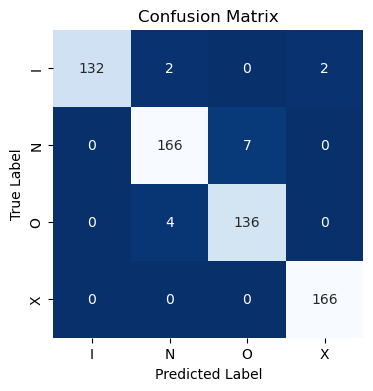

In [367]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues_r", cbar=False,  xticklabels=['I', 'N', 'O', 'X'], yticklabels=['I', 'N', 'O', 'X'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The most misclassified class shows 7 instances of the letter 'N' being classified as 'O'

<center> <h4  style="background-color:#2a9d8f; color:white;"> Naive Bayes - Probability Based Learning </h4></center>

In [368]:
from sklearn.naive_bayes import MultinomialNB

alpha = [0.1, 1, 10, 100, 1000]
accuracy1 = []
df4 = DataFrame(columns=['alpha', 'test_acc', 'MSE', 'time'])
i = 0
for a in alpha:
    NB = MultinomialNB(alpha=a)
    NB.fit(X_train, y_train)
    y_pred = NB.predict(X_test)
    
    NB_start = time.time()

    y_predtrain = NB.predict(X_train)
    NB_end = time.time()


    accuracy = accuracy_score(y_test, y_pred)
    accuracy1.append(accuracy)
    print('Accuracy for alpha',i,":",accuracy )
    MSE = mean_squared_error(y_test, y_pred)
    print("MSE for alpha",i,":", MSE)
    
    df4.loc[i] = [a, accuracy, MSE, NB_end-NB_start]
    i += 1

Accuracy for alpha 0 : 0.8504065040650407
MSE for alpha 0 : 0.44715447154471544
Accuracy for alpha 1 : 0.8504065040650407
MSE for alpha 1 : 0.44715447154471544
Accuracy for alpha 2 : 0.8520325203252033
MSE for alpha 2 : 0.44552845528455287
Accuracy for alpha 3 : 0.8422764227642277
MSE for alpha 3 : 0.5382113821138211
Accuracy for alpha 4 : 0.791869918699187
MSE for alpha 4 : 1.2894308943089432


In [369]:
df4

,alpha,test_acc,MSE,time
0,0.1,0.850407,0.447154,0.002080
1,1.0,0.850407,0.447154,0.002159
2,10.0,0.852033,0.445528,0.001998
3,100.0,0.842276,0.538211,0.001942
4,1000.0,0.791870,1.289431,0.001241


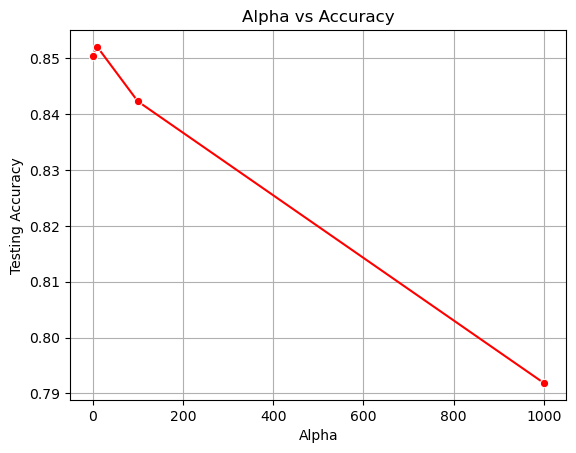

In [370]:
sns.lineplot(x=alpha, y=accuracy1, color = 'red',marker = 'o')
plt.xlabel("Alpha")
plt.ylabel("Testing Accuracy")
plt.grid(True)
plt.title("Alpha vs Accuracy")
plt.show()

In [377]:

NB = MultinomialNB(alpha=1)
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

NB_start = time.time()

y_predtrain = NB.predict(X_train)
NB_end = time.time()


accuracynb = accuracy_score(y_test, y_pred)
print('Accuracy for alpha 100:',accuracynb )
MSE_nb = mean_squared_error(y_test, y_pred)
print("MSE for alpha 100:", MSE_nb)

Accuracy for alpha 100: 0.8504065040650407
MSE for alpha 100: 0.44715447154471544


In [378]:
print(metrics.classification_report(y_test, y_pred,  target_names =['I', 'N', 'O', 'X']))

              precision    recall  f1-score   support

           I       0.95      0.88      0.92       136
           N       0.93      0.87      0.90       173
           O       0.72      0.89      0.79       140
           X       0.84      0.77      0.80       166

    accuracy                           0.85       615
   macro avg       0.86      0.85      0.85       615
weighted avg       0.86      0.85      0.85       615



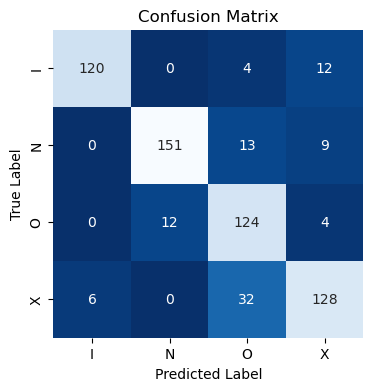

In [379]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues_r", cbar=False,  xticklabels=['I', 'N', 'O', 'X'], yticklabels=['I', 'N', 'O', 'X'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The most misclassified class shows 22 instances of the letter 'I' being classified as 'X'

<center> <h3  style="background-color:#2a9d8f; color:white;"> Step 6: Model Evaluation</h3></center>

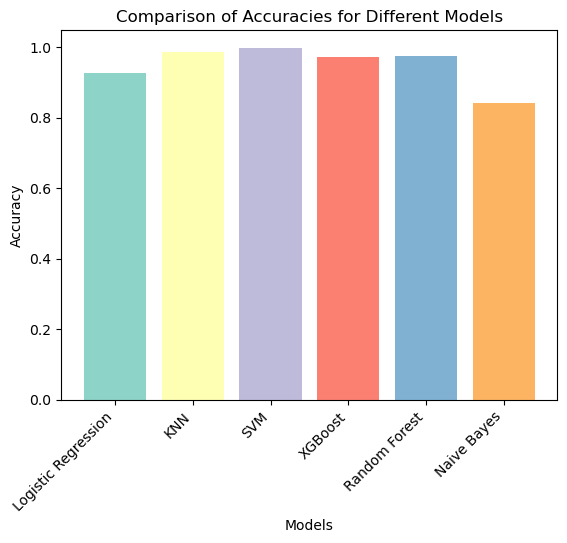

In [374]:
accuracies = [lraccuracy, knnaccuracy, accsvm, accuracyxgb, accuracyrf, accuracynb]
colors = plt.cm.Set3(np.arange(6))
model_names = ['Logistic Regression', 'KNN', 'SVM', 'XGBoost', 'Random Forest', 'Naive Bayes']
# ['skyblue', 'hotpink', 'lightcoral', 'lightsalmon', 'teal', 'yellow']
plt.bar(model_names, accuracies,  color = colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies for Different Models')
plt.xticks(rotation=45, ha='right')  
plt.show
plt.ylim = (0.5, 1.0)

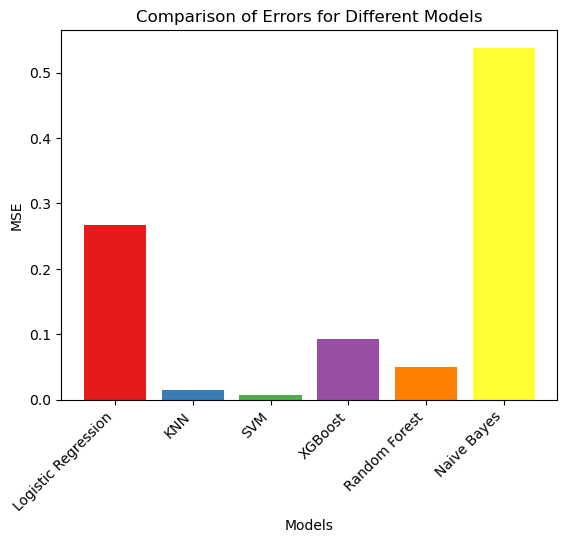

In [375]:
accuracies = [lr_MSE, knn_MSE, MSEsvm, MSExgb, MSErf, MSE_nb]
colors = plt.cm.Set1(np.arange(6))
model_names = ['Logistic Regression', 'KNN', 'SVM', 'XGBoost', 'Random Forest', 'Naive Bayes']
plt.bar(model_names, accuracies,  color = colors)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Comparison of Errors for Different Models')
plt.xticks(rotation=45, ha='right')  
plt.show
plt.ylim = (0.5, 1.0)

<center> <h4> To conlude, we noticed that we achieved a lot of high test accuracies ranging from 98% to 100% after parameter tuning and model training, this could be due to the fact that we only included 4 letters out of 26 in our study. As well as, the tested letters (X, I, O, N) are not visually similar.
Our highest performing model was SVM using RBF Kernel achieving a perfect score of 100% with only 1 misclassification in the whole data. 
Our lowest performing model was Naive Bayes, achieving a test accuracy of 87%, this could be due to its naive assumption that the features are independent of each other, while through our visualization of the correlation matrix between the features, there was evidence of dependence. </h4></center>

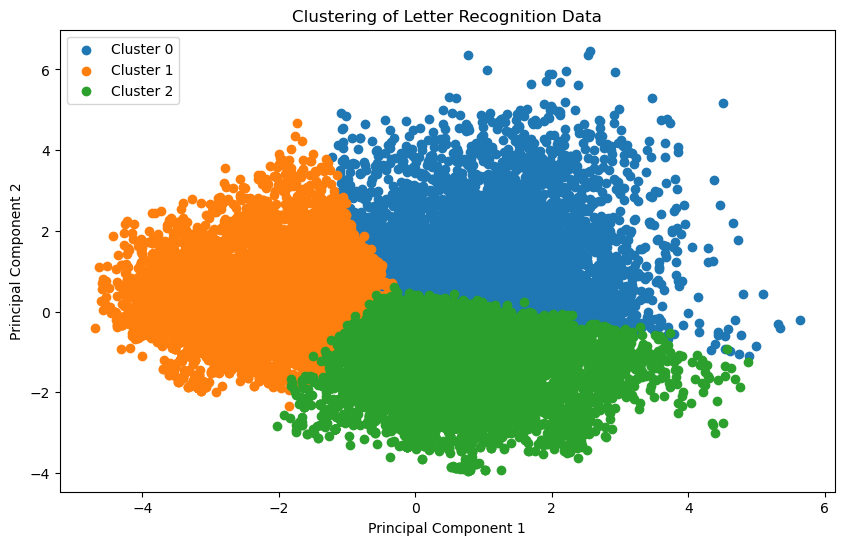

In [376]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load the letter recognition dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv("D:/Nour/Semester 7/Data Science/letter+recognition/letter-recognition.csv")

# Assume the dataset has 13 features (adjust accordingly)
features = data.iloc[:, 4:].values

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Choose the number of clusters (you can experiment with different values)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(features_standardized)

# Visualize clustering using PCA for dimensionality reduction
pca = PCA(n_components=2)
components = pca.fit_transform(features_standardized)

# Plot the clusters
plt.figure(figsize=(10, 6))

for cluster in range(n_clusters):
    cluster_data = components[data['cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.title('Clustering of Letter Recognition Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()